## Импорт библиотек

In [2]:

import tkinter as tk
from tkinter import filedialog
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns # <- regression plot
import matplotlib.pyplot as plt

In [4]:
# initializing tcl/tk interpreter >>
window = tk.Tk()
# open filedialog window on top of other windows >>
window.wm_attributes('-topmost', 1)
# this will close empty tk-window after filedialog >>
window.withdraw()
#%%
# get file name & read data >>
fileName = filedialog.askopenfilename(title="Select file",
                    filetypes=(("Excel files", "*.xlsx"),
                               ("All files", "*.*")),
                    parent=window)
df = pd.read_excel(fileName)
print('\n', df)


    y  x
0  0 -1
1  1  0
2  0  0
3  1  1


In [5]:
o1 = sm.OLS.from_formula("y ~ x", data=df).fit()

# выведем параметры рассчитанной модели
print('\n',o1.summary())
#%%
# nice output >>
info_dict={'Observations' : lambda x: f"{int(x.nobs):d}",
        'Adj. R-sq.' : lambda x: f"{x.rsquared_adj:.3f}",
        'F' : lambda x: f"{x.fvalue:.1f}",
        'F p-value' : lambda x: f"{x.f_pvalue:.3f}"}
results_table = summary_col(results=o1,
                            float_format='%0.3f',
                            stars = True,
                            info_dict=info_dict)
results_table.add_title('OLS Regression')
print('\n',results_table)


                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     2.000
Date:                Mon, 26 Dec 2022   Prob (F-statistic):              0.293
Time:                        00:34:55   Log-Likelihood:                -1.5169
No. Observations:                   4   AIC:                             7.034
Df Residuals:                       2   BIC:                             5.806
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5000      0.250      2.000      0

C:\Users\demen\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Text(-1.5749999999999957, 0.5, 'y')

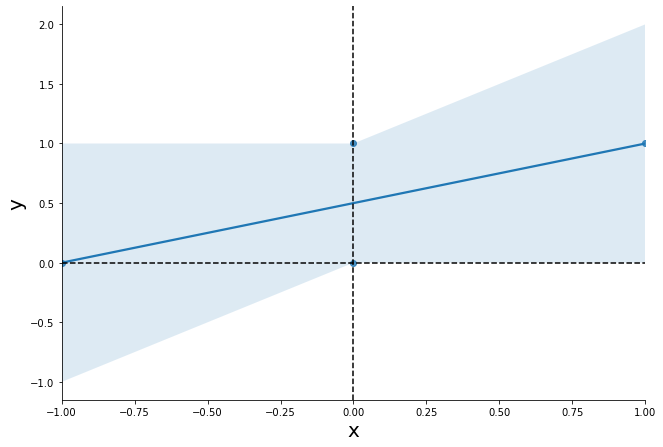

In [6]:
sns.lmplot(y="y", x="x", data=df, height=6,
           aspect=1.5)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [7]:
SfileName = filedialog.asksaveasfilename(title="Select file",
                    filetypes=(("Excel files", "*.xlsx"),
                               ("All files", "*.*")),
                    parent=window)
print('\nSaving data in\n', SfileName + ".xlsx")


Saving data in
 .xlsx


In [ ]:
## Saving data to file >>
#


## save to Excel file >>
df.to_excel(SfileName + ".xlsx", index=False)
#%%
## save to CSV file >>
df.to_csv(SfileName+".csv", index=False)
#%%

#
## import CSV file as DataFrame >>
#
df = pd.read_csv(SfileName+".csv")
print('\n',df)